# **Importing Libraries**

In [13]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


# **Load CIFAR-10 dataset**

In [14]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# **Define the classes you want to use**

In [15]:
# Define the classes you want to use (e.g., airplane and automobile)
class_names = ['airplane', 'automobile']
class_indices = [0, 1]

# **Flatten the boolean arrays for filtering**

In [16]:
# Flatten the boolean arrays for filtering
train_filter = np.ravel(np.isin(y_train, class_indices))
test_filter = np.ravel(np.isin(y_test, class_indices))

# **Filter the dataset to keep only the selected classes**

In [17]:
# Filter the dataset to keep only the selected classes
X_train_filtered, y_train_filtered = X_train[train_filter], y_train[train_filter]
X_test_filtered, y_test_filtered = X_test[test_filter], y_test[test_filter]


# **Normalize pixel values to be in the range [0, 1]**

In [18]:
# Normalize pixel values to be in the range [0, 1]
X_train_filtered, X_test_filtered = X_train_filtered / 255.0, X_test_filtered / 255.0

# **CNN model**

In [19]:
# Create a binary classification model
binary_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Use sigmoid activation for binary classification
])

# Compile the model
binary_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

# Print a summary of the model architecture
binary_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 2304)              0         
                                                                 
 dense_4 (Dense)             (None, 64)               

# **Train and Evaluate Model**

In [20]:
# Train the binary classification model
history = binary_model.fit(X_train_filtered, y_train_filtered, epochs=20, validation_data=(X_test_filtered, y_test_filtered))

# Evaluate the binary classification model
test_loss, test_acc = binary_model.evaluate(X_test_filtered, y_test_filtered, verbose=2)
print(f"Binary Classification Test Accuracy: {test_acc}")

Epoch 1/20
313/313 [==============================] - 24s 69ms/step - loss: 0.3866 - accuracy: 0.8221 - val_loss: 0.2358 - val_accuracy: 0.9020
Epoch 2/20
313/313 [==============================] - 15s 47ms/step - loss: 0.2305 - accuracy: 0.9062 - val_loss: 0.1842 - val_accuracy: 0.9340
Epoch 3/20
313/313 [==============================] - 18s 58ms/step - loss: 0.1862 - accuracy: 0.9269 - val_loss: 0.1542 - val_accuracy: 0.9380
Epoch 4/20
313/313 [==============================] - 15s 49ms/step - loss: 0.1579 - accuracy: 0.9381 - val_loss: 0.1530 - val_accuracy: 0.9410
Epoch 5/20
313/313 [==============================] - 18s 57ms/step - loss: 0.1321 - accuracy: 0.9480 - val_loss: 0.1689 - val_accuracy: 0.9315
Epoch 6/20
313/313 [==============================] - 18s 57ms/step - loss: 0.1160 - accuracy: 0.9537 - val_loss: 0.1427 - val_accuracy: 0.9455
Epoch 7/20
313/313 [==============================] - 15s 48ms/step - loss: 0.0980 - accuracy: 0.9608 - val_loss: 0.1434 - val_accuracy:

# **Plot Graphs**

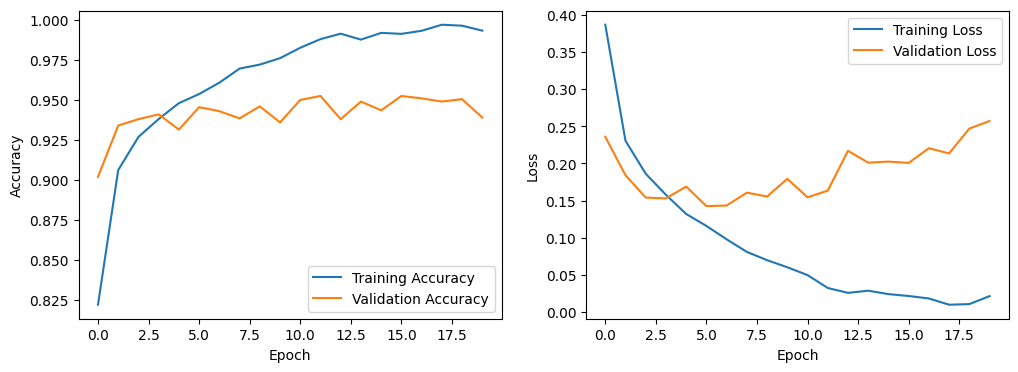

In [21]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()